In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from eng_analysis import romberg

plt.style.use('../maroon_ipynb.mplstyle')

The source code is found [here](https://github.com/gabemorris12/eng_analysis).

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Homework 3 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
The gamma function is an extension of the factorial function to the real numbers such that for all positive integers:

$$\Gamma(n)=(n-1)!$$

Defined by:

$$\Gamma(n)=\int_0^\infty t^{n-1}e^{-t}dt$$

Find:

a. $\Gamma(5)$ using the Gauss-Laguerre quadrature.
b. $\Gamma(1.5)$ to 6 decimal places using Romberg integration. You will need to select some finite but sufficiently large upper bound for the numerical integral.

## Solution
I will first find the analytical solution to check the results from part a and b.

In [2]:
sp.gamma(5)

24

In [3]:
sp.gamma(sp.S('1.5'))

0.886226925452758

### Part A
The Gauss-Laguerre quadrature is determined by finding weights that are dependent on the roots of the Laguerre polynomial up to $n$ degrees:

$$
\int_0^{\infty} e^{-x} f(x) d x \approx \sum_{i=0}^n A_i f\left(x_i\right)
$$

We can use `sympy` to get the weights and roots of the polynomial. The expression for $f(x)$ above is $f(x)=t^4$.

In [4]:
def get_weights(n):
    x_ = sp.Symbol("x")
    roots = sp.Poly(sp.laguerre(n + 1, x_)).all_roots()
    x_i_ = [rt.evalf(20) for rt in roots]
    w_i_ = [(rt/((n + 2)*sp.laguerre((n + 2), rt))**2).evalf(20) for rt in roots]
    return np.float64(x_i_), np.float64(w_i_)


x_i, A_i = get_weights(2)
x_i, A_i

(array([0.41577456, 2.29428036, 6.28994508]),
 array([0.71109301, 0.27851773, 0.01038926]))

In [5]:
f = lambda x_: x_**4
sol = sum(f(x_i)*A_i)
sol

24.000000000000004

### Part B

In [6]:
b = 16
f = lambda x_, n=1.5: x_**(n - 1)*np.exp(-x_)
sol, _ = romberg(f, 0, b)
sol

0.8862262001064446

The above result is accurate to 6 decimal places. The selected bounds can be checked by graphing the result.

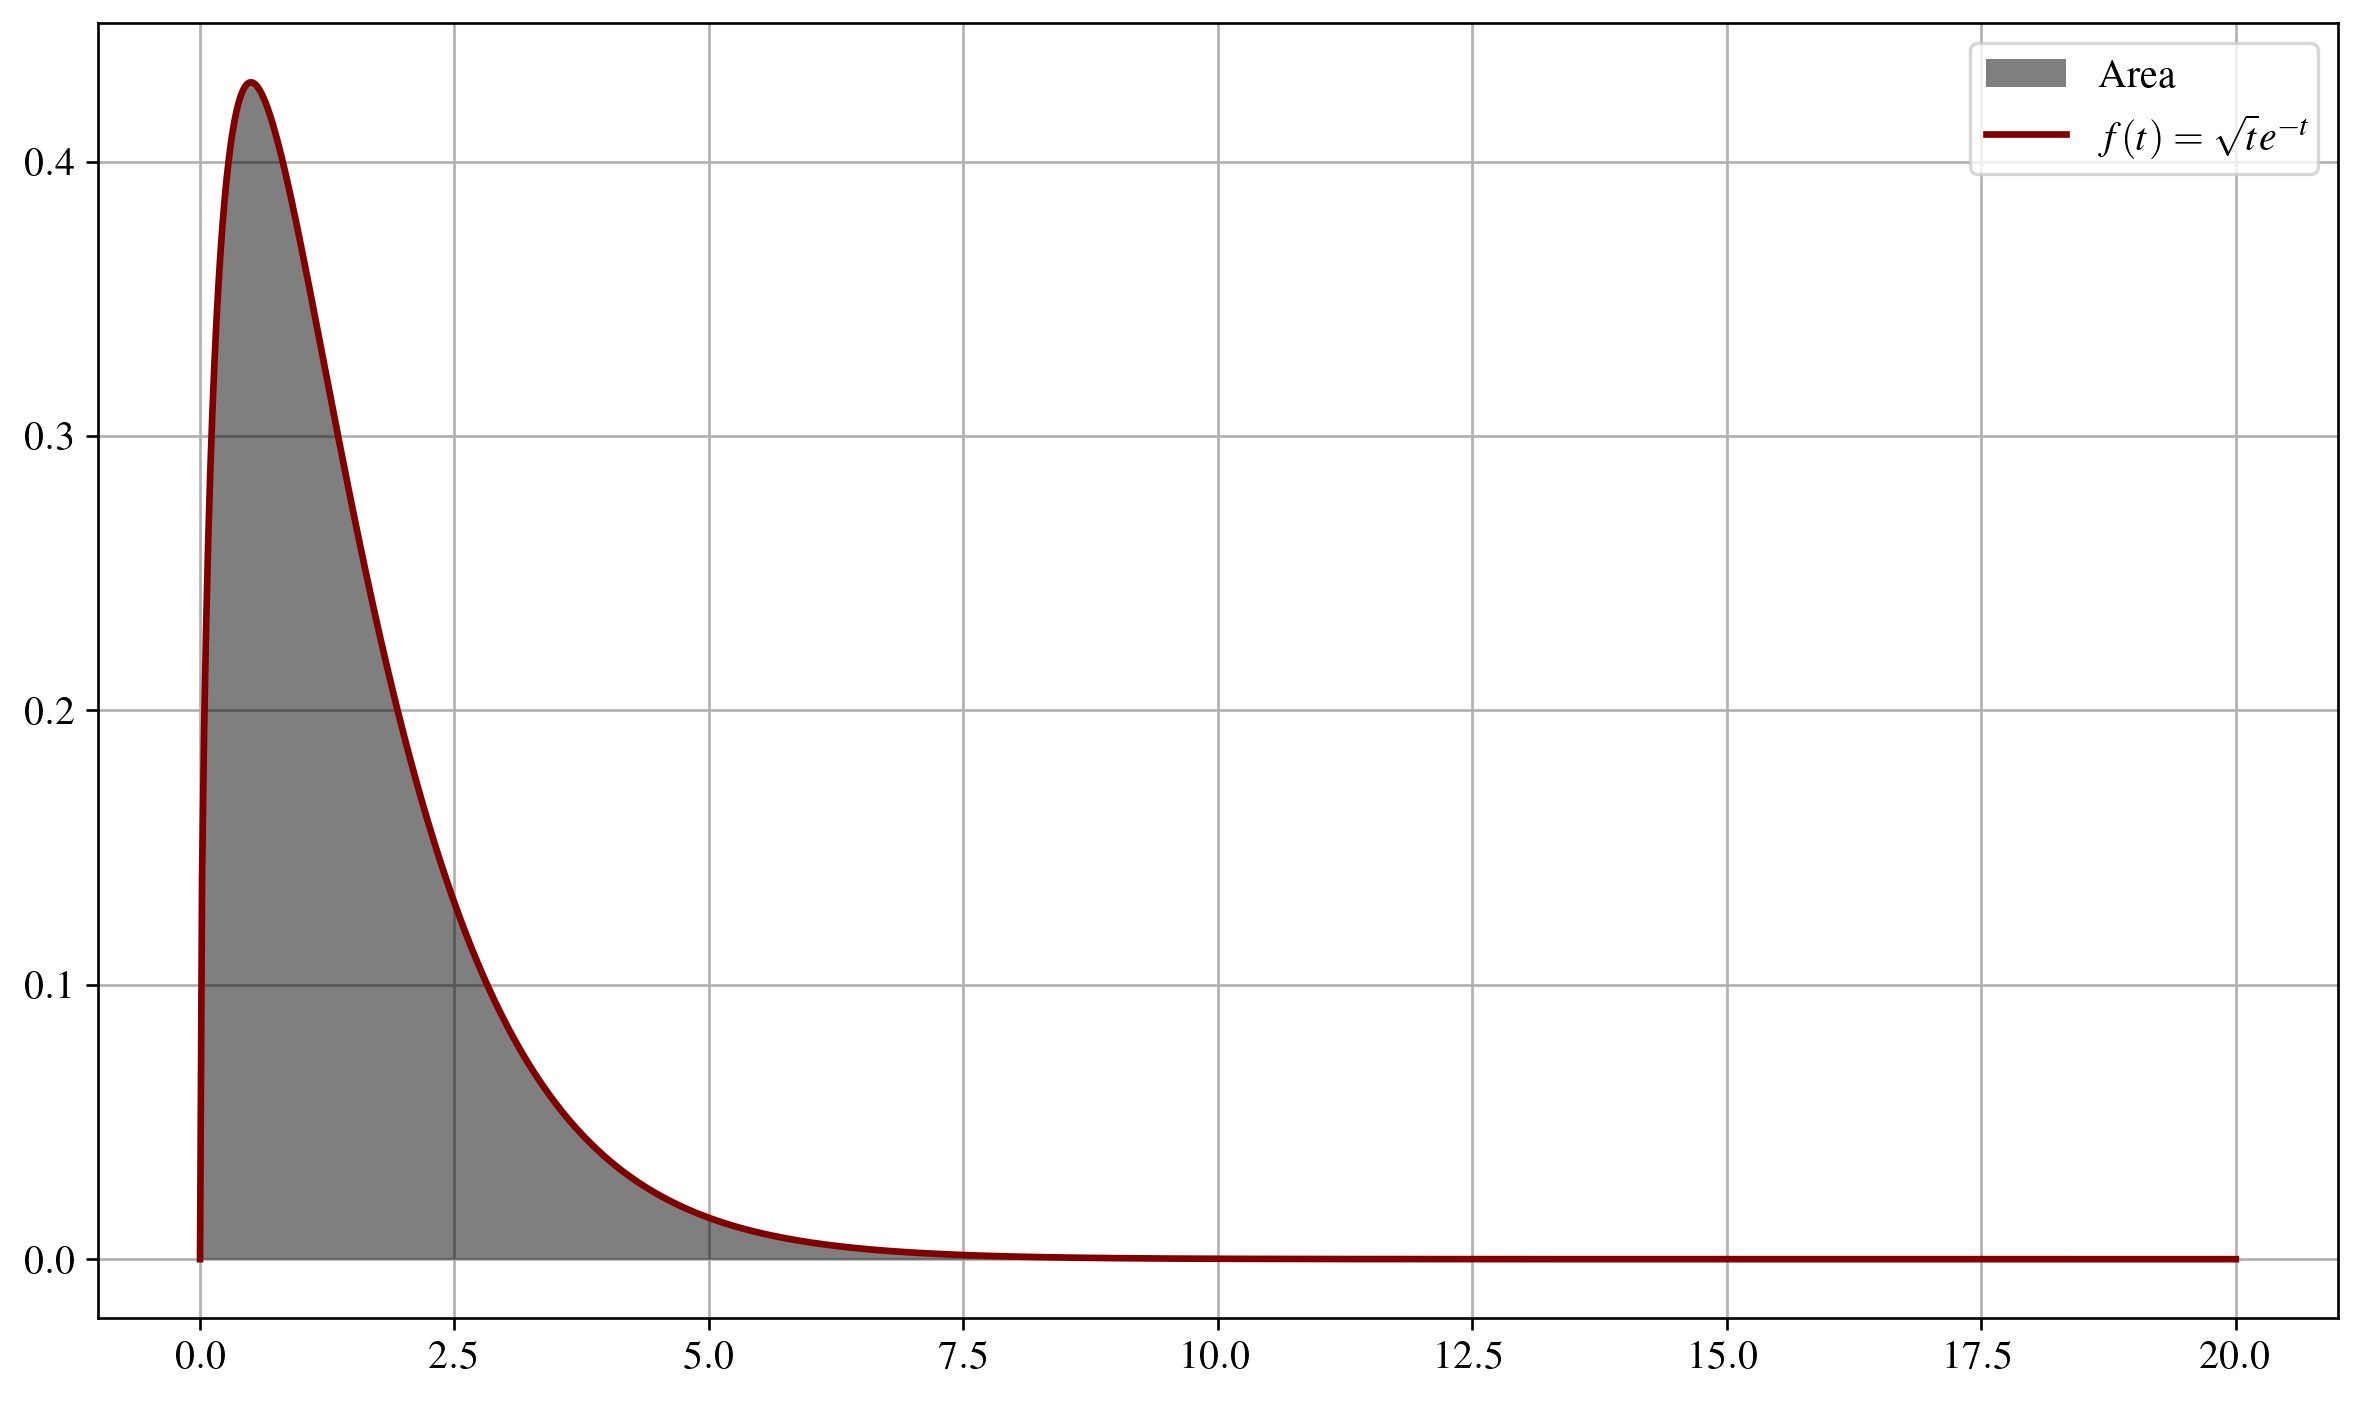

In [7]:
fig, ax = plt.subplots()
t = np.linspace(0, 20, 1000)
ax.fill_between(t[t <= b], f(t)[t <= b], zorder=2, color='black', alpha=0.5, label='Area', lw=0)
ax.plot(t, f(t), label='$f(t)=\sqrt{t}e^{-t}$')
ax.legend()
plt.show()

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Homework 3 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2
Evaluate the following integral numerically using Romberg integration. How many intervals do you need to calculate it to 6-digit precision? Is there a transformation you can use to improve this?

$$\int_0^{\pi/4}\frac{dx}{\sqrt{\sin x}}$$

## Solution
The solution requires a transformation because the romberg algorithm will divide by zero as is because of the $\sqrt{\sin(x)}$ in the denominator. First, we will use `sympy` to get a solution for checking.

In [8]:
x = sp.Symbol('x')
integral = sp.Integral(1/(sp.sqrt(sp.sin(x))), (x, 0, sp.pi/4))
integral

Integral(1/sqrt(sin(x)), (x, 0, pi/4))

In [9]:
integral.n()

1.79116133811118

The Romberg integration can be found by simply transforming the integral to a form that is continuous on the limits of integration. Here are the steps:

$$
\begin{gathered}
u = \sqrt{x} \\
du = \frac{\cos x}{2\sqrt{\sin x}} \\
dx = \frac{2\sqrt{\sin x}}{\sqrt{1 - u^4}} \\
\int_0^{\pi/4}\frac{dx}{\sqrt{\sin x}} = \int_0^{2^{-1/4}}\frac{2}{\sqrt{1 - u^4}}du
\end{gathered}
$$

In [10]:
f = lambda u: 2/np.sqrt(1 - u**4)

sol, n_panel = romberg(f, 0, 2**(-1/4))
sol

1.7911613389539645

In [11]:
n_panel  # numer of panels/intervals

64

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8213 & Homework 3 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3
Material toughness describes the ability of a material to absorb energy before fracture and is defined as the area under the stress-strain curve:

$$A=\int_0^{\epsilon_f}\sigma d\epsilon$$

Using the following stress-strain results, approximate the toughness of the specimen.

$$
\begin{array}{|c|c|}
\hline \sigma(\mathrm{MPa}) & \varepsilon \\
\hline \hline 586 & 0.001 \\
\hline 662 & 0.025 \\
\hline 765 & 0.045 \\
\hline 841 & 0.068 \\
\hline 814 & 0.089 \\
\hline 122 & 0.122 \\
\hline 150 & 0.150 \\
\hline
\end{array}
$$

## Solution
This can be solved by using the trapezoid rule.

In [12]:
sig = [586, 662, 765, 841, 814, 122, 150]  # MPa
eps = [0.001, 0.025, 0.045, 0.068, 0.089, 0.122, 0.150]

area = 0
for i in range(len(sig) - 1): area += (sig[i] + sig[i + 1])/2 * (eps[i + 1] - eps[i])
area

84.34450000000001

In [13]:
np.trapz(sig, eps)  # Just to check

84.34450000000001

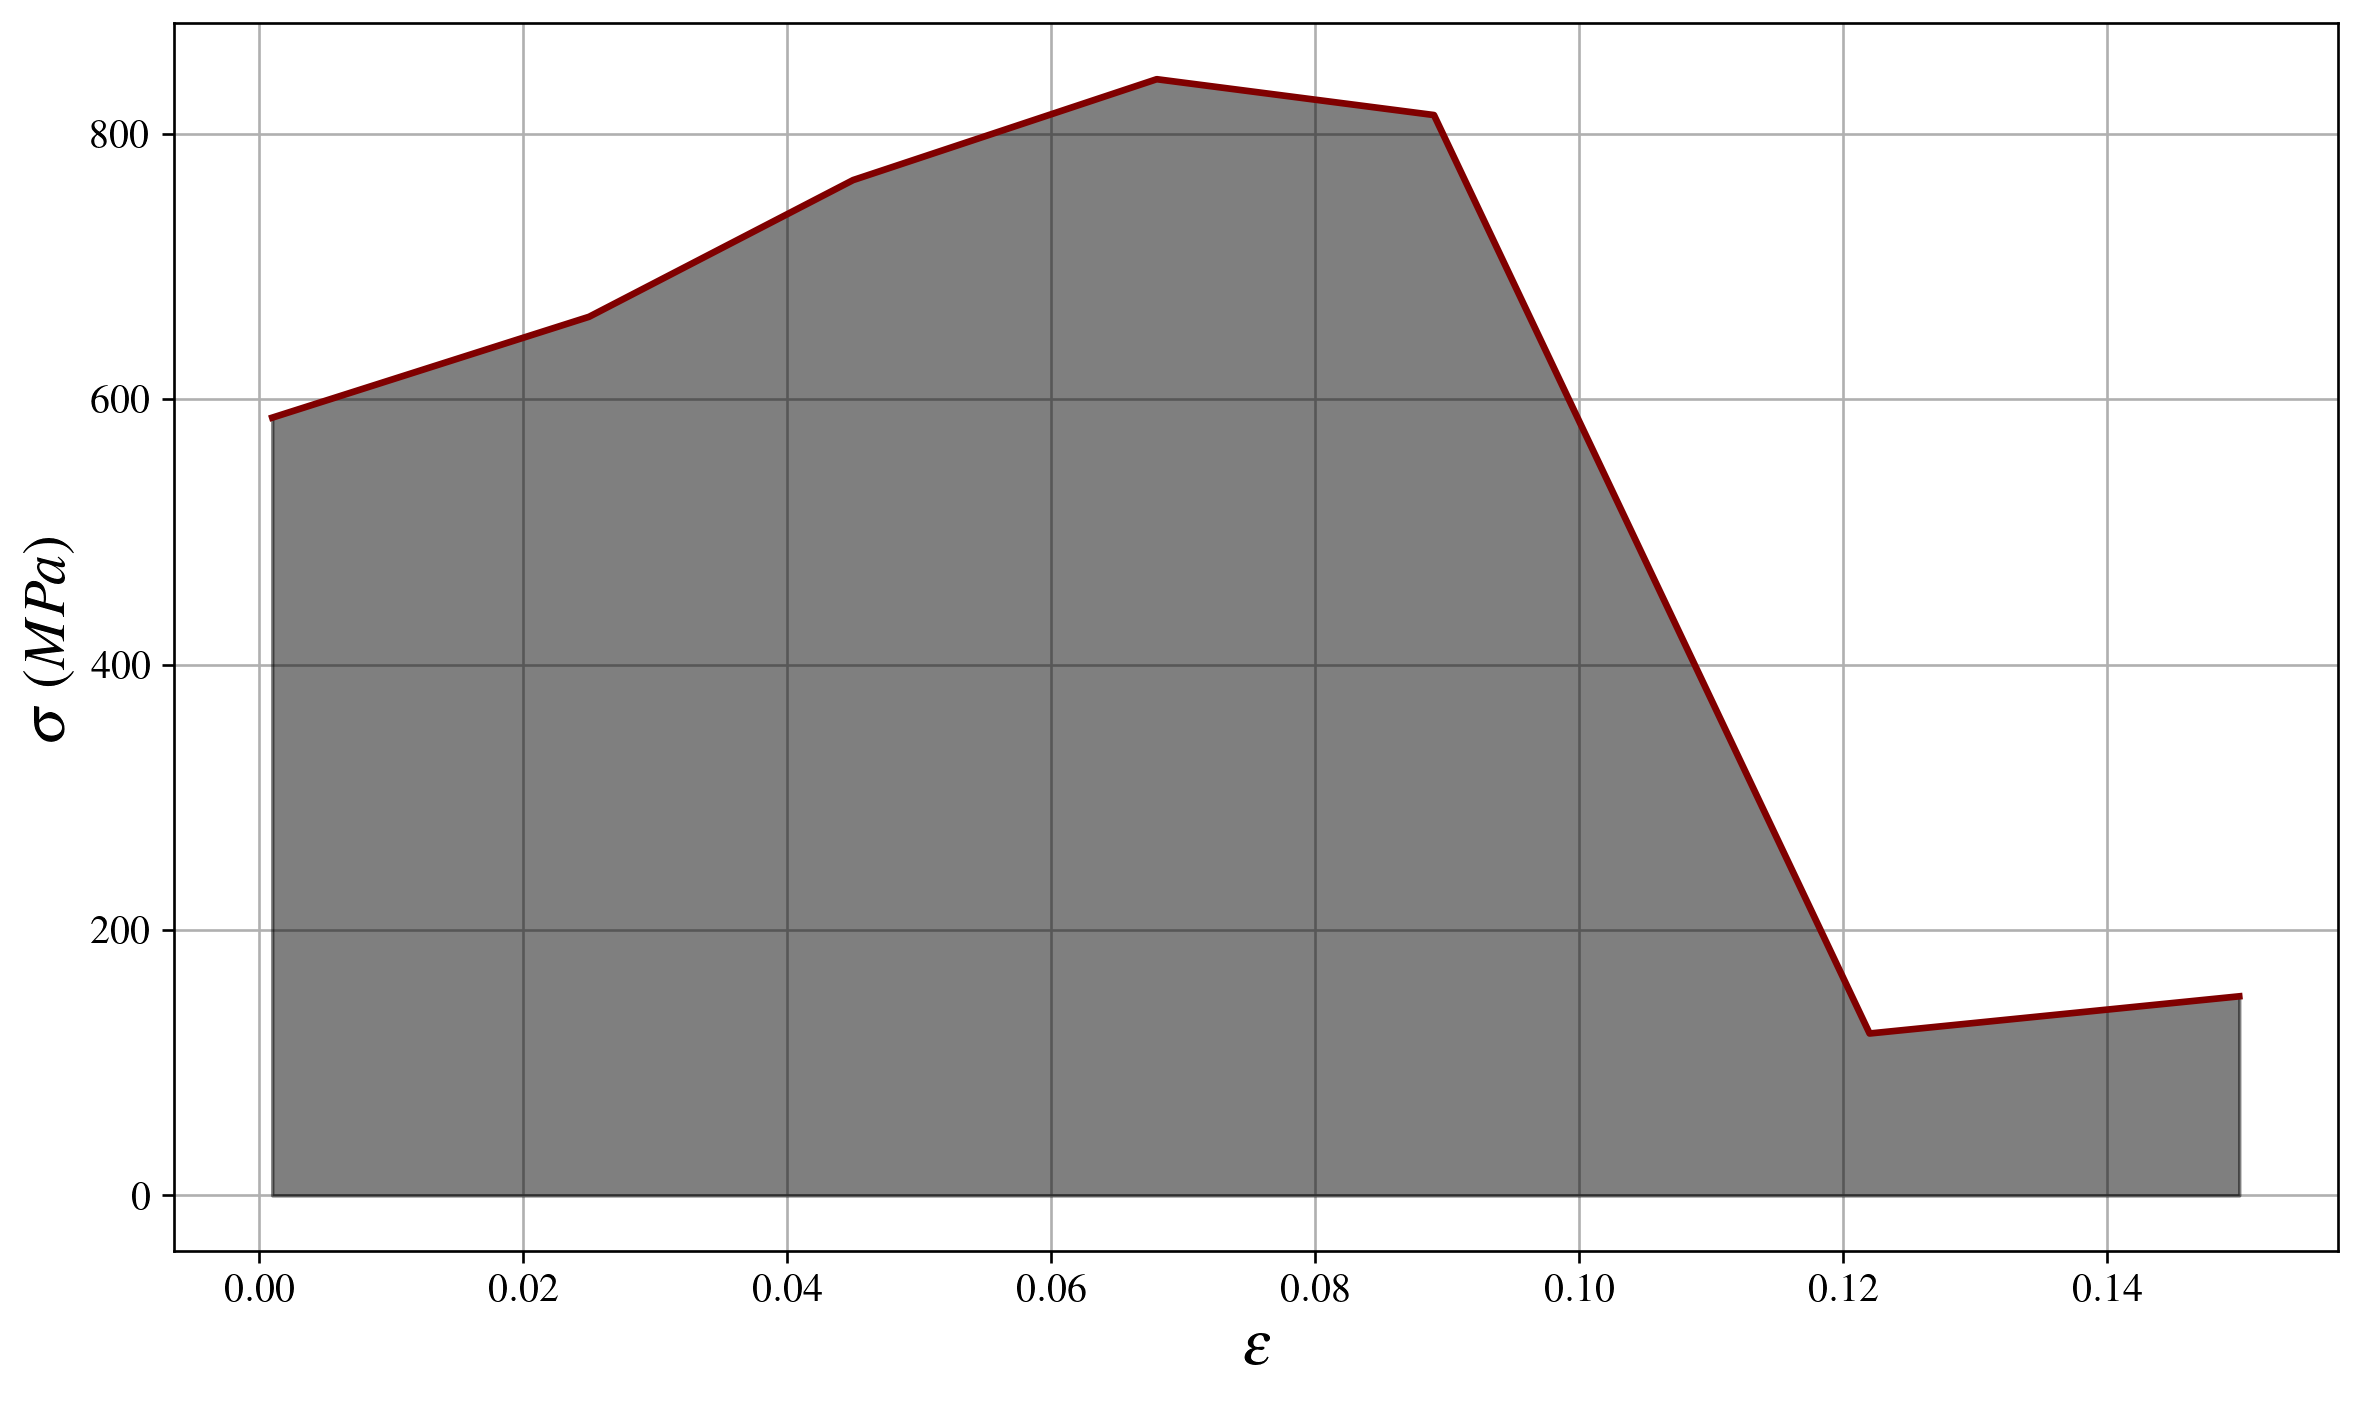

In [14]:
fig, ax = plt.subplots()
ax.plot(eps, sig, zorder=3)
ax.fill_between(eps, sig, color='black', alpha=0.5, zorder=2)
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\sigma$ ($MPa$)')
plt.show()

This data is horrible, and I don't believe it for a second.